# Setup

In [1]:
# Imports

import cv2
import numpy as np
from scipy import sparse
import pandas as pd
import networkx as nx
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
%matplotlib inline

# Image to graph

In [2]:
def _make_edges_3d(n_x, n_y, n_z=1):
    """Returns a list of edges for a 3D image.
    Parameters
    ===========
    n_x: integer
        The size of the grid in the x direction.
    n_y: integer
        The size of the grid in the y direction.
    n_z: integer, optional
        The size of the grid in the z direction, defaults to 1
    """
    vertices = np.arange(n_x * n_y * n_z).reshape((n_x, n_y, n_z))
    edges_deep = np.vstack((vertices[:, :, :-1].ravel(),
                            vertices[:, :, 1:].ravel()))
    edges_right = np.vstack((vertices[:, :-1].ravel(),
                             vertices[:, 1:].ravel()))
    edges_down = np.vstack((vertices[:-1].ravel(), vertices[1:].ravel()))
    edges = np.hstack((edges_deep, edges_right, edges_down))
    return edges

In [3]:
def _compute_altitude_3d(edges, img):
    n_x, n_y, n_z = img.shape
    gradient = np.abs(img[edges[0] // (n_y * n_z),
                          (edges[0] % (n_y * n_z)) // n_z,
                          (edges[0] % (n_y * n_z)) % n_z] -
                          img[edges[1] // (n_y * n_z),
                          (edges[1] % (n_y * n_z)) // n_z,
                          (edges[1] % (n_y * n_z)) % n_z])
    
    altitude_function = 'gradient_magnitude'
    
    '''
    Replace this with our fixed altitude fucntion.
    
    '''
    if altitude_function is 'gradient_magnitude':
        pass
    elif altitude_function is 'static':
        #not supported
        pass
    elif altitude_function is 'dynamic':
        #not supported
        pass
    elif altitude_function is 'random':
        gradient = np.random.randint(255 , size=gradient.shape)
    else:
        raise ValueError(altitude_function + ' is not a valid altitude function.')
    
    return gradient

In [4]:
img = cv2.imread('1.jpg', 0)
img = img[0:5, 0:5]
img = img.astype(np.int16)
dtype=None
img = np.atleast_3d(img)
n_x, n_y, n_z = img.shape
edges = _make_edges_3d(n_x, n_y, n_z)
weights = _compute_altitude_3d(edges, img)
diag = img.ravel()
n_voxels = diag.size
diag_idx = np.arange(n_voxels)
i_idx = np.hstack((edges[0], edges[1]))
j_idx = np.hstack((edges[1], edges[0]))
matrix = sparse.coo_matrix((np.hstack((weights, weights, diag)),
                          (np.hstack((i_idx, diag_idx)),
                           np.hstack((j_idx, diag_idx)))),
                          (n_voxels, n_voxels),
                          dtype=dtype)
graph = nx.from_scipy_sparse_matrix(matrix)
graph.remove_edges_from(graph.selfloop_edges())
nx.get_edge_attributes(graph,'weight')

,0,1,2,3,4
0,88,105,95,84,92
1,75,110,80,72,84
2,92,78,83,81,63
3,87,112,86,77,98
4,105,73,110,81,109


In [5]:
#set positions 
positions = dict()
values = dict()
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        positions[row * img.shape[1] + col] = ((col), (img.shape[1]-row))
        #print row * img.shape[1] + col, " is ", row,col
        #print row * img.shape[1] + col, " is ", col,img.shape[1]-row

,0,1,2,3,4
0,88,105,95,84,92
1,75,110,80,72,84
2,92,78,83,81,63
3,87,112,86,77,98
4,105,73,110,81,109


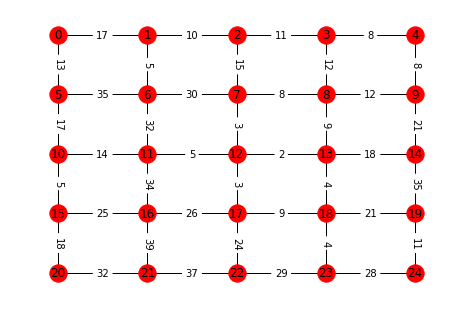

In [8]:
fixed_nodes = positions.keys()
pos = nx.spring_layout(graph,pos=positions, fixed = fixed_nodes)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw(graph,pos)
nx.draw_networkx_labels(graph,pos)
edge_labels = nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
pd.DataFrame(img.squeeze(axis=(2,)))

# Boundary Probability

# Static Body Training

** - Loop this until convergence**

## Step 1

### Compute Altitude

### Determine MSF

### Determine Constrained MSF

## Step 2 

### Identify Root Edges

### Define weights

### Define Loss

## Step 3

### Obtain Updated Parameters